In [1]:
import bilby
import numpy as np
from scipy.integrate import quad
from ler import LeR
import json
import matplotlib.pyplot as plt
%matplotlib inline

# for generating mass distribution
from gwcosmo import priors as p

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


## BNS mass model chosen (ALSING)

In [33]:
ler = LeR(npool=int(4),z_min=0., z_max=10., batch_size=25000,
    m_min=1., 
    m_max=3.,
    event_type='BNS',
    category='popI_II',
    sub_category='Alsing',
    spin_constant=0.,
    mtot_min=2., 
    mtot_max=18., 
    nsamples_mtot=50, 
    nsamples_mass_ratio=100, 
    sampling_frequency=2048.,
    waveform_approximant = 'TaylorF2', 
    minimum_frequency = 20., 
    snr_type = 'interpolation', 
    waveform_inspiral_must_be_above_fmin=False,
    interpolator_dir="../interpolator_pickle")

Given: Inspiral waveform, TaylorF2.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ../interpolator_pickle/L1/halfSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ../interpolator_pickle/H1/halfSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ../interpolator_pickle/V1/halfSNR_dict_1.pickle


## Sampling (Unlensed)

In [35]:
# sample unlensed parameters
ler.batch_size = 50000
ler.unlensed_cbc_statistics(nsamples=1000000, json_file="./unlensed_params_BNS_Alsing_1M.json");

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
Batch no. 6
sampling gw source params...
calculating snrs...
Batch no. 7
sampling gw source params...
calculating snrs...
Batch no. 8
sampling gw source params...
calculating snrs...
Batch no. 9
sampling gw source params...
calculating snrs...
Batch no. 10
sampling gw source params...
calculating snrs...
Batch no. 11
sampling gw source params...
calculating snrs...
Batch no. 12
sampling gw source params...
calculating snrs...
Batch no. 13
sampling gw source params...
calculating snrs...
Batch no. 14
sampling gw source params...
calculating snrs...
Batch no. 15
sampling gw s

## Looking at the Mass distribution (Alsing)

In [36]:
ler.gw_param = "unlensed_params_BNS_Alsing_1M.json"
ler.gw_param.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1'])

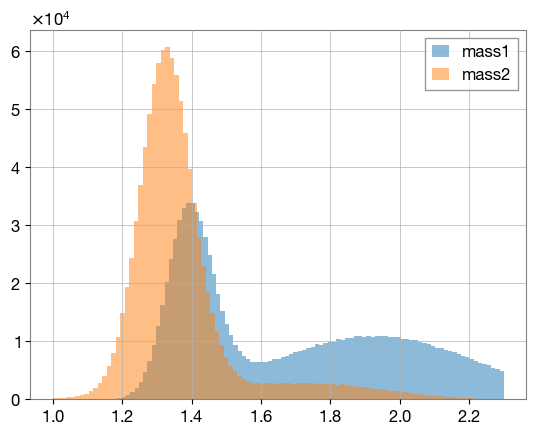

In [37]:
# plot mass_1, mass_2 (source frame)
mass1 = ler.gw_param['mass_1_source']
mass2 = ler.gw_param['mass_2_source']
plt.hist(mass1, bins=100, alpha=0.5, label='mass1')
plt.hist(mass2, bins=100, alpha=0.5, label='mass2')
plt.legend()
plt.show()

## Looking at the redshift distribution

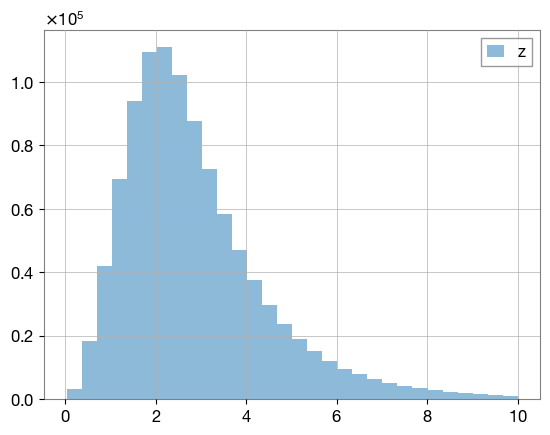

In [39]:
# redshift distribution
z = ler.gw_param['zs']

# plot redshift distribution
plt.hist(z, bins=30, alpha=0.5, label='z')
plt.legend()
plt.show()

## Sampling (lensed)

In [42]:
# sample lensed parameters
lensed_param = ler.lensed_cbc_statistics(nsamples=1000000, json_file="./lensed_params_BNS_Alsing_1M.json", resume=True);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./lensed_params_BNS_Alsing_1M.json
Batch no. 17
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:11<00:00, 4545.00it/s]


calculating snrs...
Batch no. 18
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4618.75it/s]


calculating snrs...
Batch no. 19
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4641.55it/s]


calculating snrs...
Batch no. 20
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4585.27it/s]


calculating snrs...


### 2 image should cross $SNR_{th}=8.$ 

In [71]:
# rates
unlensed_rate = ler.unlensed_rate(gw_param='./unlensed_params_BNS_Alsing_1M.json',
    snr_threshold=8.0,
    jsonfile='./unlensed_params_detectable_BNS_Alsing_1M.json',)

getting gw_params from json file ./unlensed_params_BNS_Alsing_1M.json...
total unlensed rate (yr^-1) (with step function): 3.315079809880175
storing detectable unlensed params in ./unlensed_params_detectable_BNS_Alsing_1M.json


In [72]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS_Alsing_1M.json',
    jsonfile='./lensed_params_detectable_BNS_Alsing_1M.json',)

getting lensed_param from json file ./lensed_params_BNS_Alsing_1M.json...
total lensed rate (yr^-1) (with step function): 0.004029233084008694
storing detectable lensed params in ./lensed_params_detectable_BNS_Alsing_1M.json...


In [73]:
ler.rate_comparision();

unlensed_rate: 3.315079809880175
lensed_rate: 0.004029233084008694
ratio: 822.7570211902444


In [74]:
# get dict data from json file
with open('./lensed_params_detectable_BNS_Alsing_1M.json') as f:
    data = json.load(f)

# arrange in decending order across each row of snr
data['opt_snr_net'] = np.array(data['opt_snr_net'])
data['opt_snr_net'] = -np.sort(-data['opt_snr_net'], axis=1)

print("number of events with 1st image SNR > 8: ", np.sum(data['opt_snr_net'][:,0]>8))
print("number of events with 2nd image SNR > 8: ", np.sum(data['opt_snr_net'][:,1]>8))
print("number of events with 3rd image SNR > 8: ", np.sum(data['opt_snr_net'][:,2]>8))
print("number of events with 4th image SNR > 8: ", np.sum(data['opt_snr_net'][:,3]>8))

number of events with 1st image SNR > 8:  35
number of events with 2nd image SNR > 8:  35
number of events with 3rd image SNR > 8:  1
number of events with 4th image SNR > 8:  0


## $SNR_{th}=4.$ 

In [61]:
# two of the four images have SNR > 8
unlensed_rate = ler.unlensed_rate(gw_param='./unlensed_params_BNS_Alsing_1M.json',
    snr_threshold=4.0,
    jsonfile='./unlensed_params_detectable_BNS_Alsing_1M.json',)

getting gw_params from json file ./unlensed_params_BNS_Alsing_1M.json...
total unlensed rate (yr^-1) (with step function): 24.973601234430646
storing detectable unlensed params in ./unlensed_params_detectable_BNS_Alsing_1M.json


In [64]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS_Alsing_1M.json',
    jsonfile='./lensed_params_detectable_BNS_Alsing_1M.json',
    snr_threshold=4.0,
    num_img=2,)

getting lensed_param from json file ./lensed_params_BNS_Alsing_1M.json...
total lensed rate (yr^-1) (with step function): 0.03902600044225565
storing detectable lensed params in ./lensed_params_detectable_BNS_Alsing_1M.json...


In [65]:
ler.rate_comparision();

unlensed_rate: 24.973601234430646
lensed_rate: 0.03902600044225565
ratio: 639.922127592412


In [69]:
# get dict data from json file
with open('./lensed_params_detectable_BNS_Alsing_1M.json') as f:
    data = json.load(f)

# arrange in decending order across each row of snr
data['opt_snr_net'] = np.array(data['opt_snr_net'])
data['opt_snr_net'] = -np.sort(-data['opt_snr_net'], axis=1)

print("number of events with 1st image SNR > 4: ", np.sum(data['opt_snr_net'][:,0]>4))
print("number of events with 2nd image SNR > 4: ", np.sum(data['opt_snr_net'][:,1]>4))
print("number of events with 3rd image SNR > 4: ", np.sum(data['opt_snr_net'][:,2]>4))
print("number of events with 4th image SNR > 4: ", np.sum(data['opt_snr_net'][:,3]>4))

number of events with 1st image SNR > 4:  339
number of events with 2nd image SNR > 4:  339
number of events with 3rd image SNR > 4:  22
number of events with 4th image SNR > 4:  4


* very less likely to be detected (4th image)

## Comaprision

In [76]:
# How much improvement
# comparing number detectable lensed images with SNR_th > 4 and SNR_th > 8 (on the condition that at least two images have SNR_th)
339/35

9.685714285714285

In [77]:
339-35

304

* almost 10 times improvement
* if we consider SNR_th=8, 304 events out of 339 events are sub-threshold events (4<SNR<8) 